In [1]:
from experiments.experiments_results import rank_results, filter_exp
s, r = rank_results(only_gpu=False, comp_col='arch', based_on='user', rank_by='nb_params')
print(s)
print(r)

    Puesto 1 Puesto 2 Puesto 3 Puesto 4
rnn       12        0       36        0
cnn        0        0        0       48
tcn        0       36       12        0
mlp       36       12        0        0
    bo              best_rank_by Puesto 1 Puesto 2 Puesto 3 Puesto 4
0    0      [173, 617, 849, 965]      mlp      tcn      rnn      cnn
1    1      [173, 617, 849, 965]      mlp      tcn      rnn      cnn
2    2      [173, 617, 849, 965]      mlp      tcn      rnn      cnn
3    3      [173, 617, 849, 965]      mlp      tcn      rnn      cnn
4    4      [173, 617, 849, 965]      mlp      tcn      rnn      cnn
5    5      [173, 617, 849, 965]      mlp      tcn      rnn      cnn
6    7      [173, 617, 849, 965]      mlp      tcn      rnn      cnn
7    8      [173, 617, 849, 965]      mlp      tcn      rnn      cnn
8    9      [173, 617, 849, 965]      mlp      tcn      rnn      cnn
9   10      [173, 617, 849, 965]      mlp      tcn      rnn      cnn
10  12      [173, 617, 849, 965]      mlp

In [1]:
from experiments.experiments_results import rank_results_agg_func
s, r = rank_results_agg_func(only_gpu=False, comp_col='arch', based_on='poi', rank_by='nb_params', agg_func='max')
print(s)
print(r)

TypeError: Index(...) must be called with a collection of some kind, 'nb_params' was passed

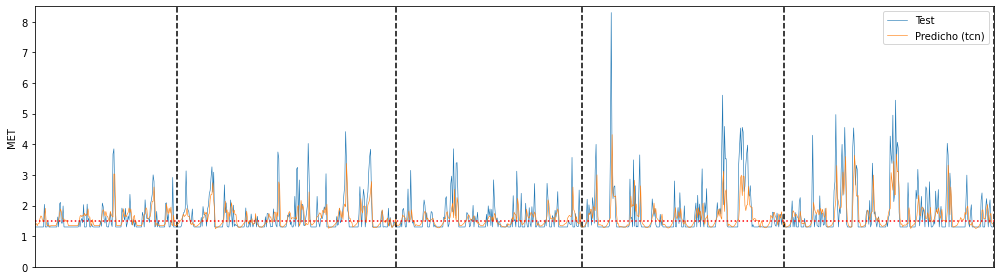

In [32]:
from experiments.experiments_results import print_results
print_results(fromi=1, toi=5, archs=['tcn'], poi='imp', user=32, lags=8, period=1, gran=60)

In [31]:
from experiments.experiments_results import filter_exp
filter_exp(only_gpu= False, user=32)



,poi,arch,user,gran,nb_lags,period,nb_params,centroid,mean_score,mean_time,score_0,score_1,score_2,score_3,score_4,time_0,time_1,time_2,time_3,time_4
7545,imp,tcn,32,60,8,1,1001,high_met,0.3000,6.1204,0.110,0.221,0.186,0.569,0.414,3.064,4.594,6.333,4.911,11.700
7539,imp,tcn,32,60,2,1,1001,high_met,0.3018,8.6528,0.116,0.219,0.181,0.589,0.404,3.664,6.221,12.074,7.130,14.175
7536,imp,tcn,32,60,1,1,1001,high_met,0.3024,2.6544,0.122,0.220,0.187,0.574,0.409,1.092,3.115,3.634,3.231,2.200
5241,imp,rnn,32,60,8,1,849,high_met,0.3034,1.9858,0.117,0.249,0.182,0.564,0.405,0.679,1.335,2.067,2.650,3.198
7542,imp,tcn,32,60,4,1,1001,high_met,0.3046,3.2368,0.119,0.235,0.173,0.584,0.412,1.241,1.722,2.274,3.883,7.064
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4103,per,mlp,32,30,8,4,1181,high_met,3.1410,0.0924,0.259,13.277,0.384,0.888,0.897,0.070,0.061,0.091,0.104,0.136
4094,per,mlp,32,30,1,4,173,high_met,3.2206,0.1402,0.237,13.843,0.316,0.870,0.837,0.088,0.088,0.135,0.176,0.214
4092,per,mlp,32,30,1,1,173,high_met,3.2986,0.1386,0.153,14.902,0.264,0.573,0.601,0.079,0.098,0.135,0.168,0.213
4098,per,mlp,32,30,4,1,605,high_met,5.4456,0.0954,0.205,25.560,0.258,0.581,0.624,0.070,0.063,0.093,0.106,0.145


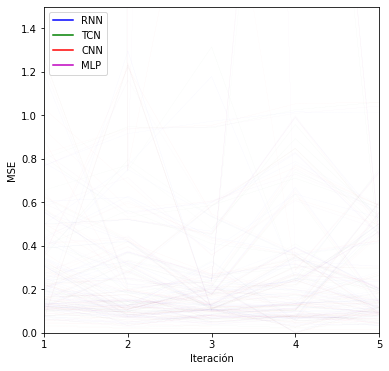

In [17]:
from experiments.experiments_results import plot_iterations_score_pattern
plot_iterations_score_pattern(max_mse=1.5, gran=60, poi='imp', nb_lags=4, period=4)

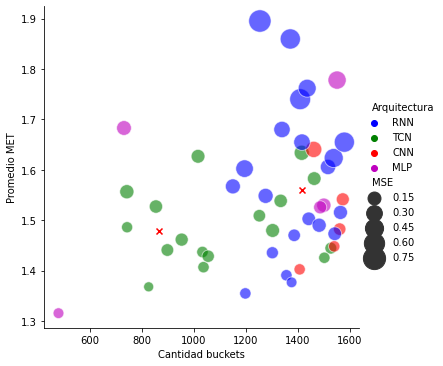

In [59]:
from preprocessing.datasets import get_clean_dataset
from sklearn.cluster import KMeans
from sklearn.metrics import pairwise_distances_argmin_min
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd 

from experiments.experiments_results import get_experiments_data, filter_exp, order_exp_by

def plot_clusters_performance(ix=-1, **kwargs):
    df = get_clean_dataset()
    d = df.groupby(level=0)['slevel'].agg(['count', 'mean', 'std'])
    nb_kmean = 2
    kmeans = KMeans(n_clusters=nb_kmean).fit(d)


    def get_mse_and_best_arch(x):
        return x.sort_values(by='mean_score').loc[:,['mean_score','arch']].iloc[0,:]

    df_exp = order_exp_by(only_gpu=False, ix=ix, **kwargs)
    per_user_best = df_exp.groupby('user').apply(get_mse_and_best_arch) 
    per_user_best.arch = per_user_best.arch.str.upper()
    d = pd.concat([d, per_user_best], axis=1)
    d.columns = ['Cantidad buckets', 'Promedio MET','Desviacion Estándar MET', 'MSE', 'Arquitectura']

    colors={'RNN': 'b', 'TCN': 'g', 'CNN': 'r', 'MLP': 'm'}

    g = sns.relplot(x='Cantidad buckets',
                    y='Promedio MET',
                    hue='Arquitectura',
                    size='MSE',
                    sizes=(100, 500),
                    alpha=.6,
                    data=d,
                    palette=colors)

    g.ax.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], c='r', marker='x')

    plt.show()

plot_clusters_performance(poi='per')

In [32]:
from experiments.experiments_results import rank_results, filter_exp
import matplotlib.pyplot as plt
import numpy as np

s, r = rank_results(only_gpu=False, comp_col='poi', based_on='user', rank_by='score')    
l = list(r.best_rank_by.apply(list).values)
l_zipped = list(zip(*l))
best_poi = np.array(l_zipped[0])
worst_poi = np.array(l_zipped[1])
diff = worst_poi - best_poi 
poi = r["Puesto 1"]


C:\Users\marsa\Miniconda3\envs\tesis-env\lib\site-packages\pandas\core\ops\array_ops.py:55: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = libops.scalar_compare(x.ravel(), y, op)


C:\Users\marsa\Miniconda3\envs\tesis-env\lib\site-packages\pandas\core\ops\array_ops.py:55: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = libops.scalar_compare(x.ravel(), y, op)
[0.112  0.0292 0.0098 0.011  0.014  0.0196 0.053  0.029  0.0216 0.0056
 0.0292 0.0122 0.0696 0.0228 0.0366 0.0024 0.027  0.0062 0.0072 0.0682
 0.0038 0.0364 0.0588 0.005  0.0764 0.018  0.04   0.0104 0.034  0.0214
 0.0966 0.04   0.0052 0.0116 0.0936 0.0012 0.017  0.0458 0.0358 0.0224
 0.006  0.059  0.0076 0.07   0.0226 0.0114 0.0132 0.0322]


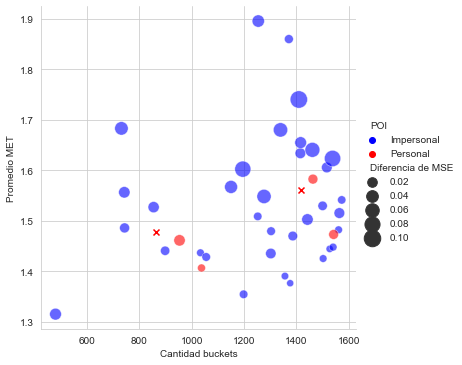

In [1]:
from experiments.experiments_results import plot_per_cluster_mse_diff_poi,plot_clusters_performance_without_arch, plot_clusters_performance

plot_per_cluster_mse_diff_poi()   
#plot_clusters_performance_without_arch()
#plot_clusters_performance(poi='imp')

In [131]:
from experiments.experiments_results import get_experiments_data
from scipy.stats import ttest_ind
import numpy as np 
import matplotlib.pyplot as plt

exps = get_experiments_data(only_gpu=True)

from_it = 0
score_cols = [f'score_{i}' for i in range(from_it,5)]
exps['mod_mean_score'] = exps.loc[:,score_cols].mean(axis=1)

per = exps.loc[exps.poi=='per'].loc[:,'mod_mean_score']
per = per.dropna()
per = per.values


imp = exps.loc[exps.poi=='imp'].loc[:,'mod_mean_score']
imp = imp.dropna()
imp = imp.values

tresh = 1
print(f'valores en per sobre {tresh}: {np.sum(per > tresh)}')
per.sort()
print(f'los 3 primeros valores mas grandes son {per[-4:-1]}')
print('')
print(f'valores en imp sobre {tresh}: {np.sum(imp > tresh)}')
imp.sort()
print(f'los 3 primeros valores mas grandes son {imp[-4:-1]}')
print('')
print(f'mean per: {np.mean(per)}')
print(f'mean imp: {np.mean(imp)}')

ttest_ind(per,imp)

per.sort()



valores en per sobre 1: 1021
los 3 primeros valores mas grandes son [3.85209635e+09 3.99552364e+09 4.48492139e+09]

valores en imp sobre 1: 119
los 3 primeros valores mas grandes son [248.1694 359.171  540.2846]

mean per: 8413400.233836392
mean imp: 1.0471745768229168


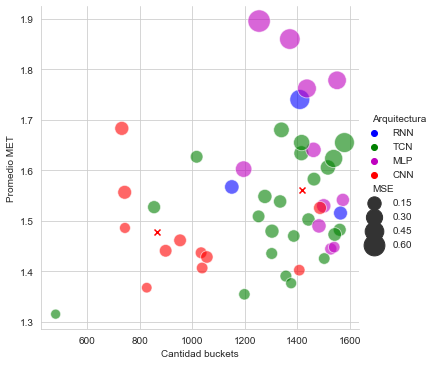

In [2]:
from experiments.experiments_results import plot_clusters_performance

plot_clusters_performance(poi='imp')

[26 28]
[[1.41672222e+03 1.56009694e+00 5.17317707e-01]
 [8.63916667e+02 1.47806053e+00 4.27397273e-01]]


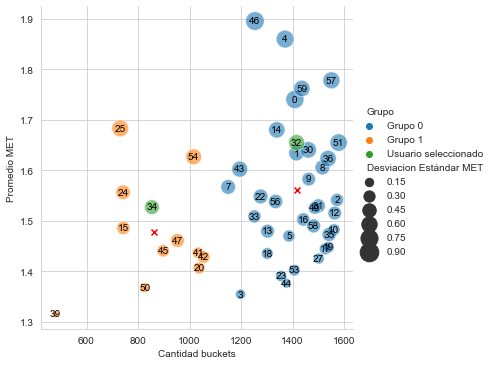

In [2]:
from tunning.utils import plot_user_selection
plot_user_selection(2)